In [416]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [418]:
df = pd.read_csv("/content/drive/MyDrive/day71-K-means/data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [419]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

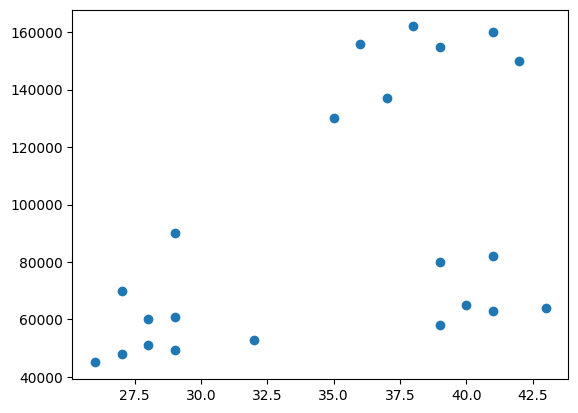

In [420]:
plt.scatter(df['Age'], df['Income($)'])

### Applying : K-Means Clustering

In [421]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [422]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [423]:
df['cluster'] = y_pred

In [424]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


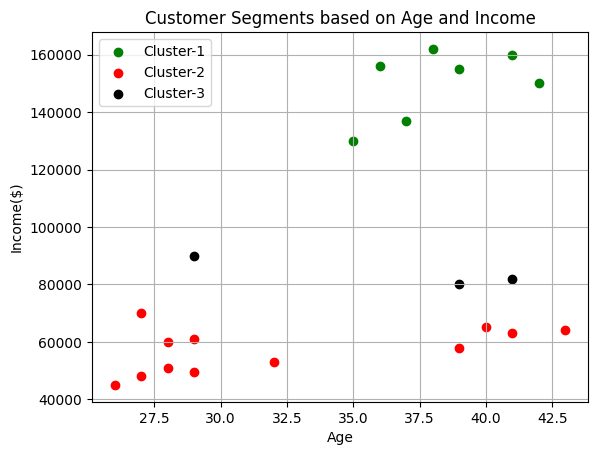

In [425]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster-1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster-2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster-3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title('Customer Segments based on Age and Income')
plt.grid(True)
plt.show()

### We got poor clustering when we made cluster without scaling features. To solve this issue we have to apply Scaling (eg. MinMax Scaler)

In [426]:
df.columns

Index(['Name', 'Age', 'Income($)', 'cluster'], dtype='object')

In [427]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

#scaling 'Income' column
df['Income($)'] = scaler.transform(df[['Income($)']])

#scaling 'Age' column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [428]:
df['Age'].std()

0.34712118493821353

In [429]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [430]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [431]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

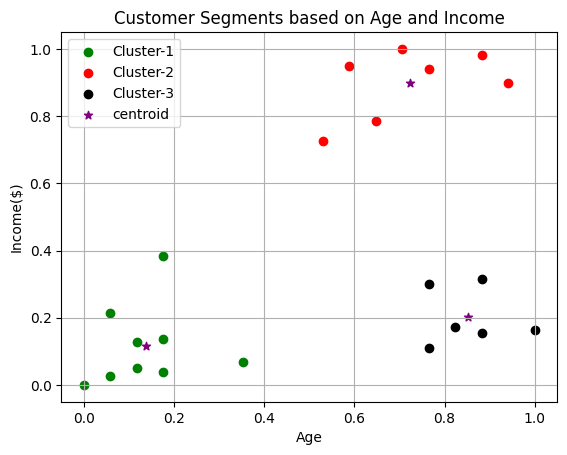

In [432]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster-1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster-2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster-3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title('Customer Segments based on Age and Income')
plt.grid(True)
plt.show()

### Elbow Plot

In [433]:
sse = []
lst_of_k = [1,2,3,4,5,6,7,8,9,10]

for k in lst_of_k:
  # print(k)
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])

  # print(km.inertia_)
  sse.append(km.inertia_)

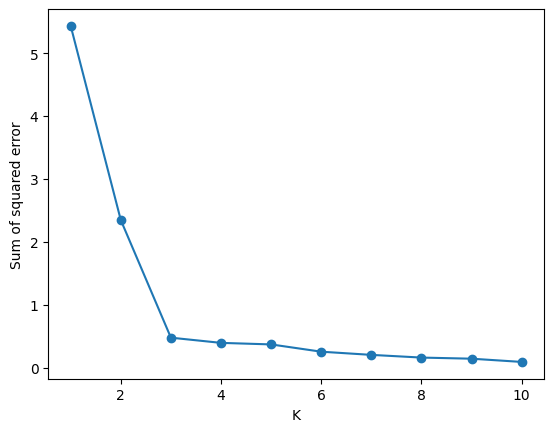

In [434]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(lst_of_k, sse, marker='o')